# Classification model- Medical Kit



### Evaluation Metrics in Classification

![Log loss](./images/logloss.png)
![Metrics Clasification](./images/Metrics-Class.png)
![Matrix of Confusition](./images/mofc.png)

1. Precision: Represents the proportion of true positives (TP) over the total of positive predictions (TP + FP). It is a measure of the model's accuracy in predicting positive samples.(Prediction Columns)

2. Recall: Represents the proportion of true positives (TP) over the total of actual positive samples (TP + FN). It is a measure of the model's ability to correctly identify positive samples. (Actual Rows)

3. F1-Score: It is a measure that combines both precision and recall into a single value. The F1-Score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

4. Accuracy: It measures the overall correctness of the model's predictions by comparing the number of correct predictions to the total number of predictions.

5. Support: Represents the number of real samples in each class. It provides information about class imbalance and the amount of data used to calculate the metrics.

6. Area Under the ROC Curve (AUC-ROC): It evaluates the model's ability to discriminate between positive and negative instances across various classification thresholds. The ROC curve plots the true positive rate against the false positive rate, and AUC-ROC represents the area under this curve. A higher AUC-ROC indicates better model performance



In [152]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import missingno as miss
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split,cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier

In [153]:
# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)

In [154]:
# Loading dataset
data = pd.read_csv('./bdb-ml-test/dataset/train.csv',dtype={'ID': str})  # Datos de Entrenamiento
datates = pd.read_csv('./bdb-ml-test/dataset/test.csv',dtype={'ID': str})  # datos a predecir(no conoce el s istema)
data["ID"] = data["ID"].astype(pd.StringDtype())
datates["ID"] = datates["ID"].astype(pd.StringDtype())

####  pygWalker libray
It is a library for python that it converted your data  in a interface visual
https://docs.kanaries.net/es/pygwalker/index
pip install pygWalker libray to visualize data

## Exploratory analysis to visualize missing data and outliers

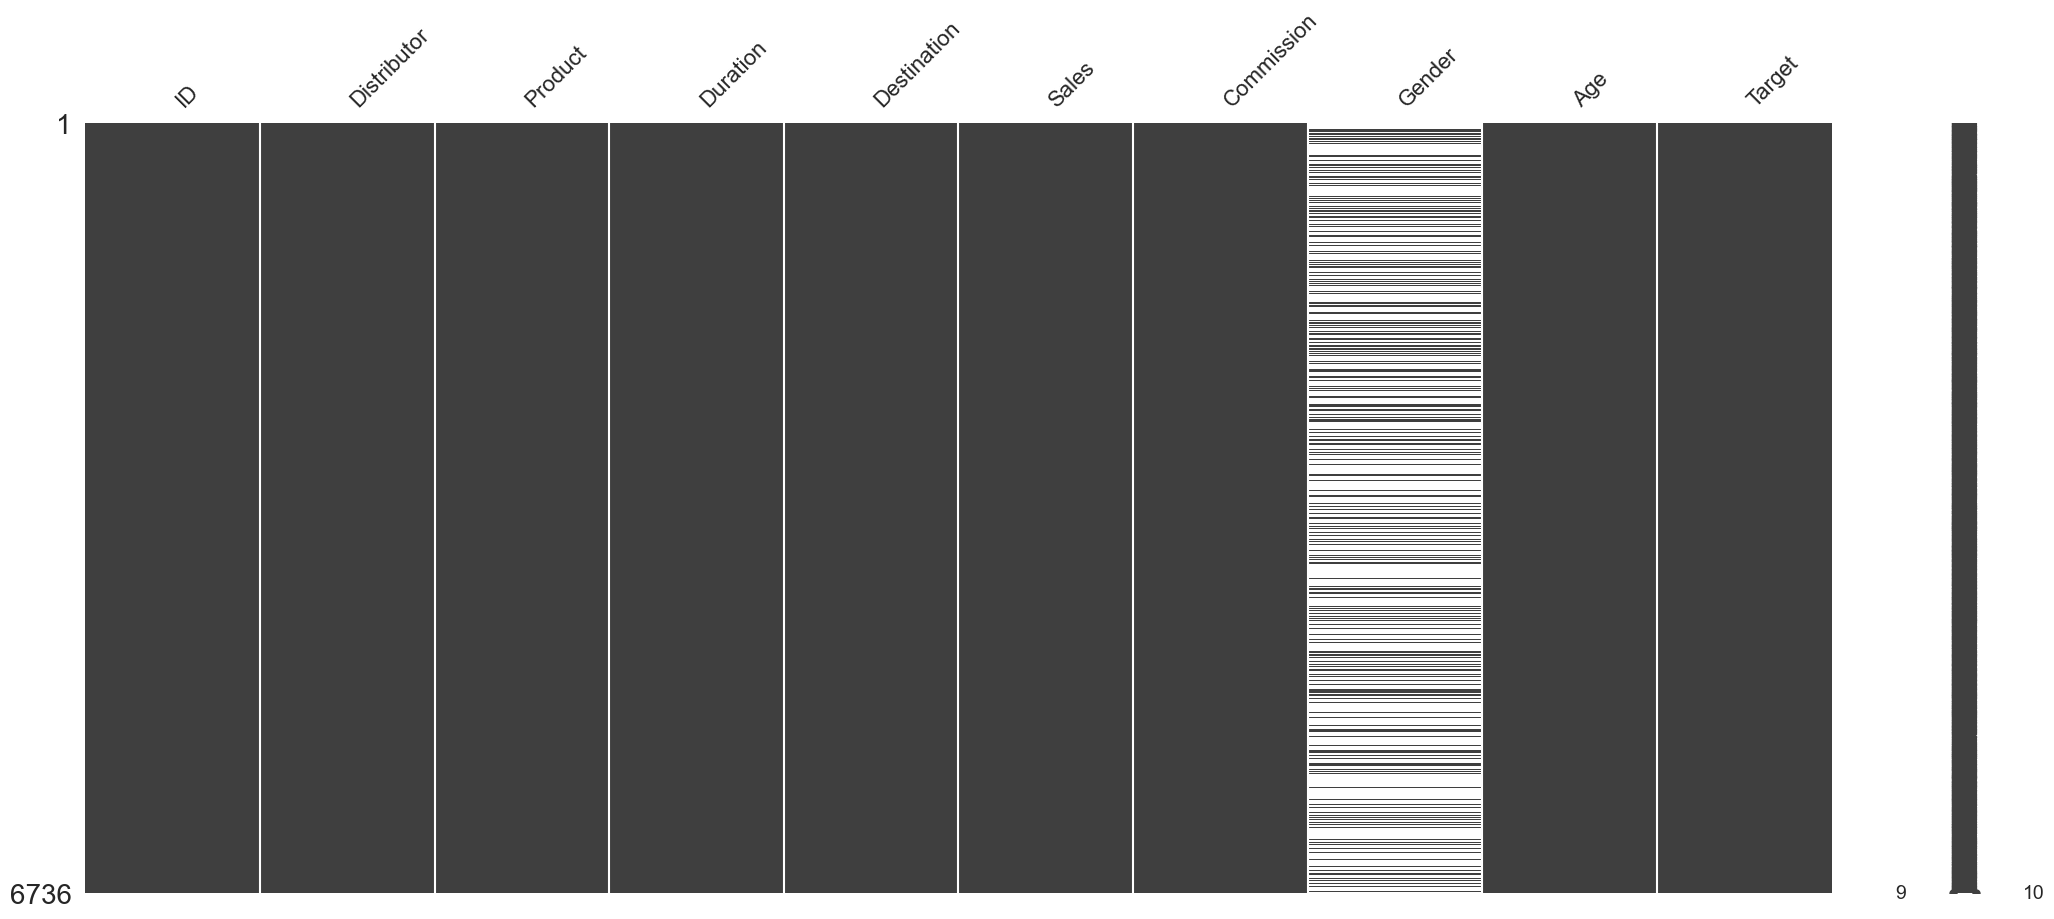

In [155]:
#Visualize missing data columns
miss.matrix(data);

<Axes: >

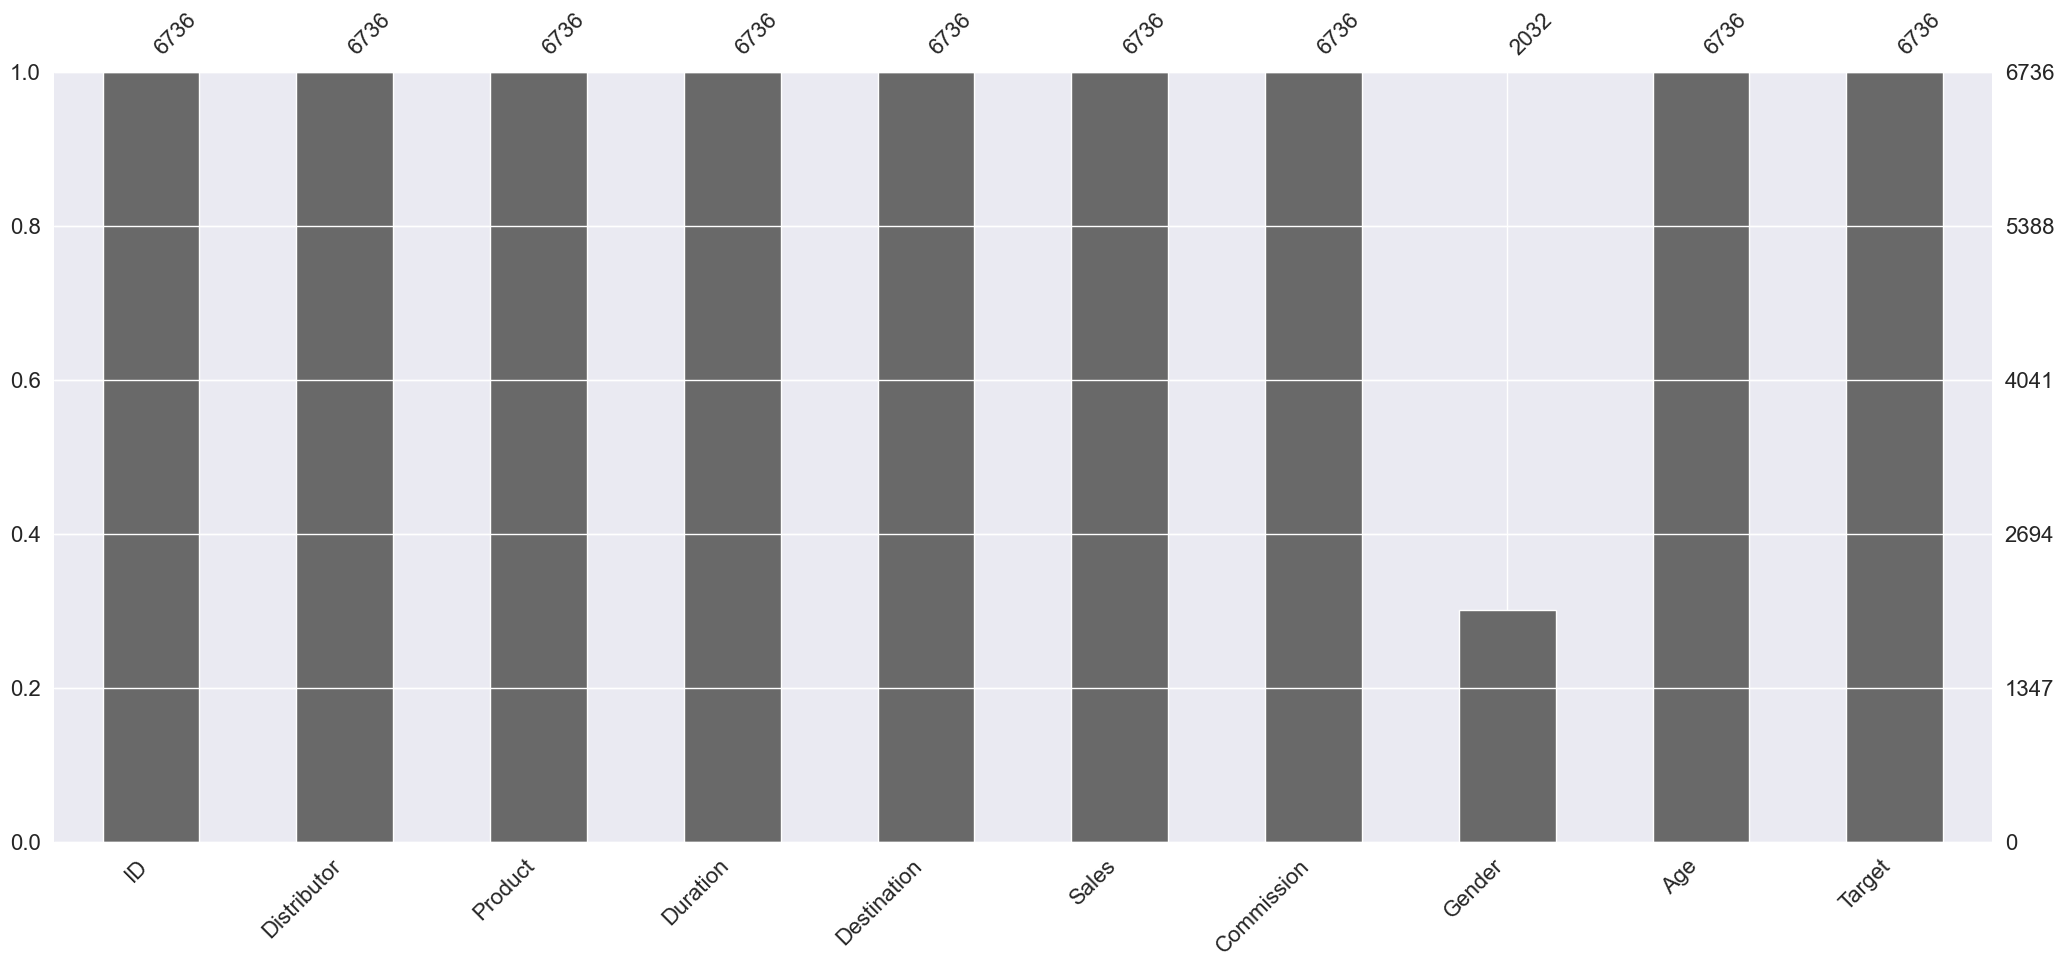

In [156]:
miss.bar(data)

### Data Preprocessing - Handling missing data
#### 1. Discard columns with too many missing values.

<Axes: >

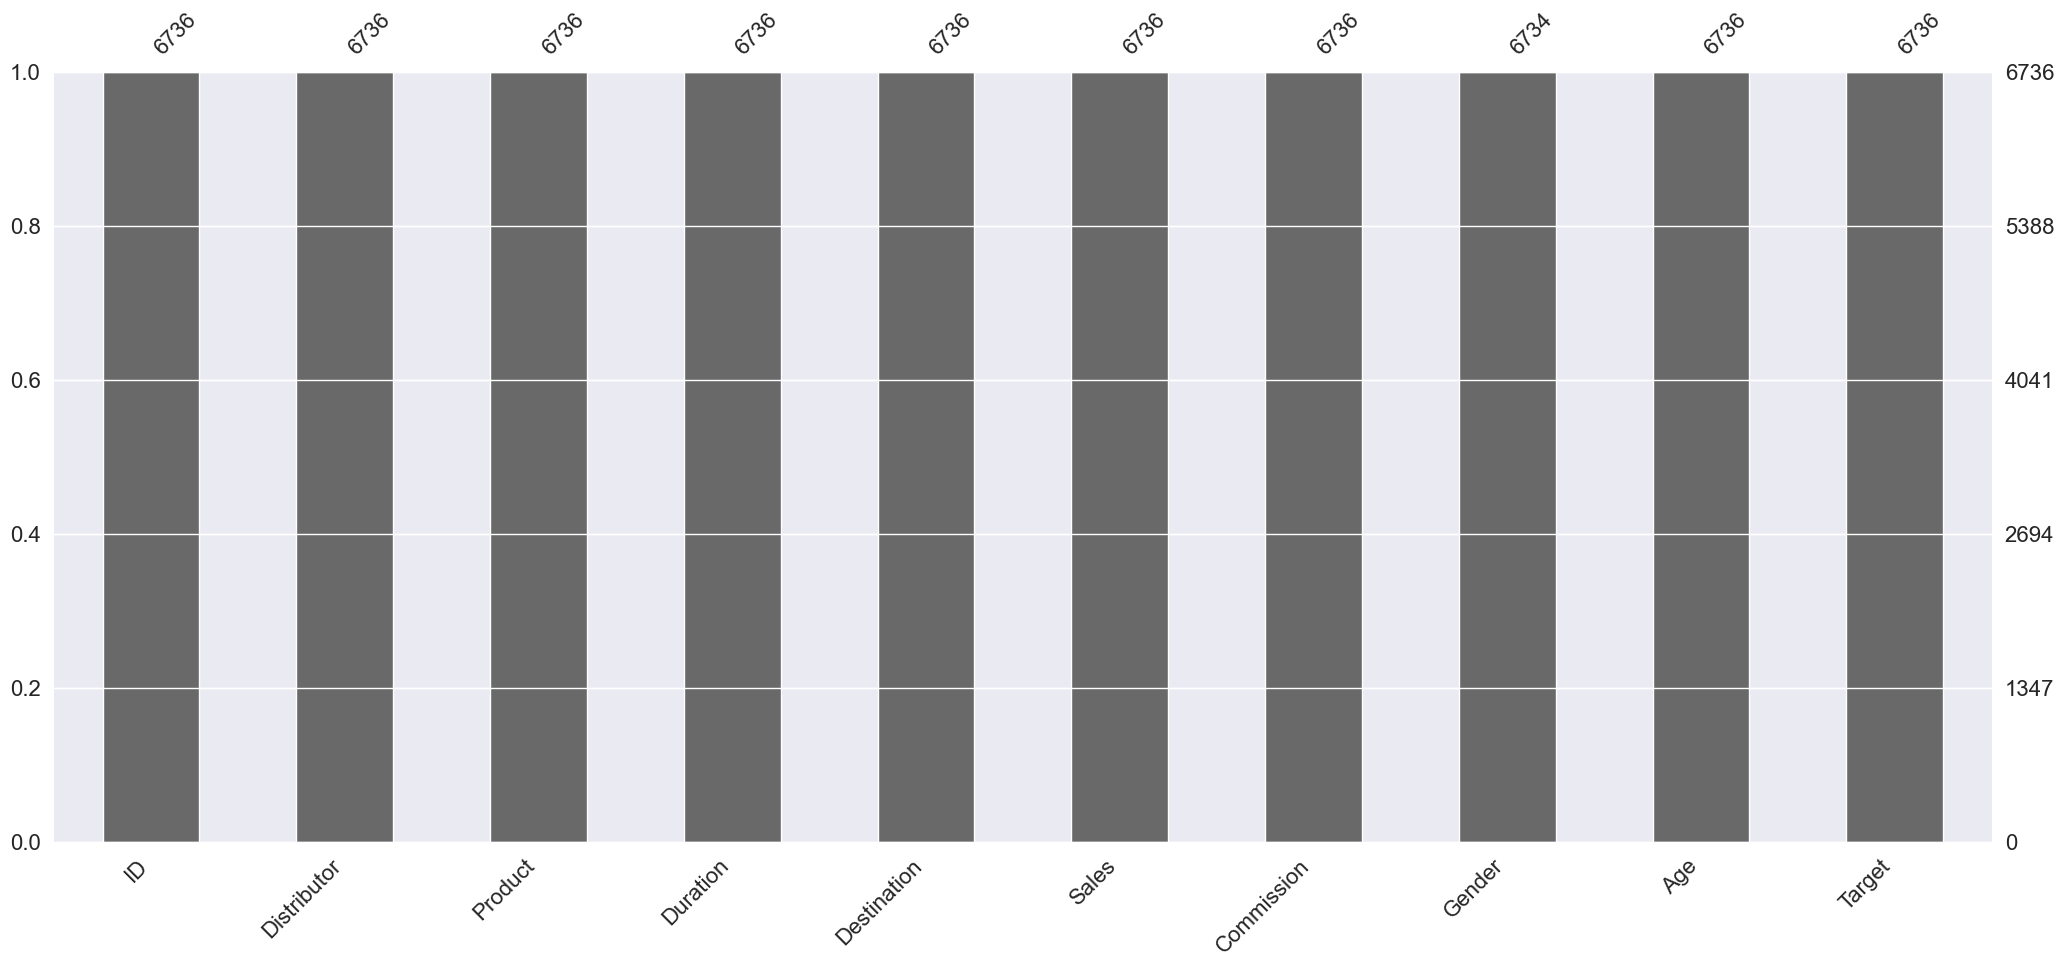

In [157]:
# Imputation of missing values with the media of each columns  
datafill=data.copy()
#method='ffill': Rellena los valores nulos hacia adelante (desde el primer valor no nulo posterior) dentro de cada grupo definido por una o más columnas.
datafill['Gender'].fillna(method='bfill', inplace=True)
miss.bar(datafill)

##### Visualize data
https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/

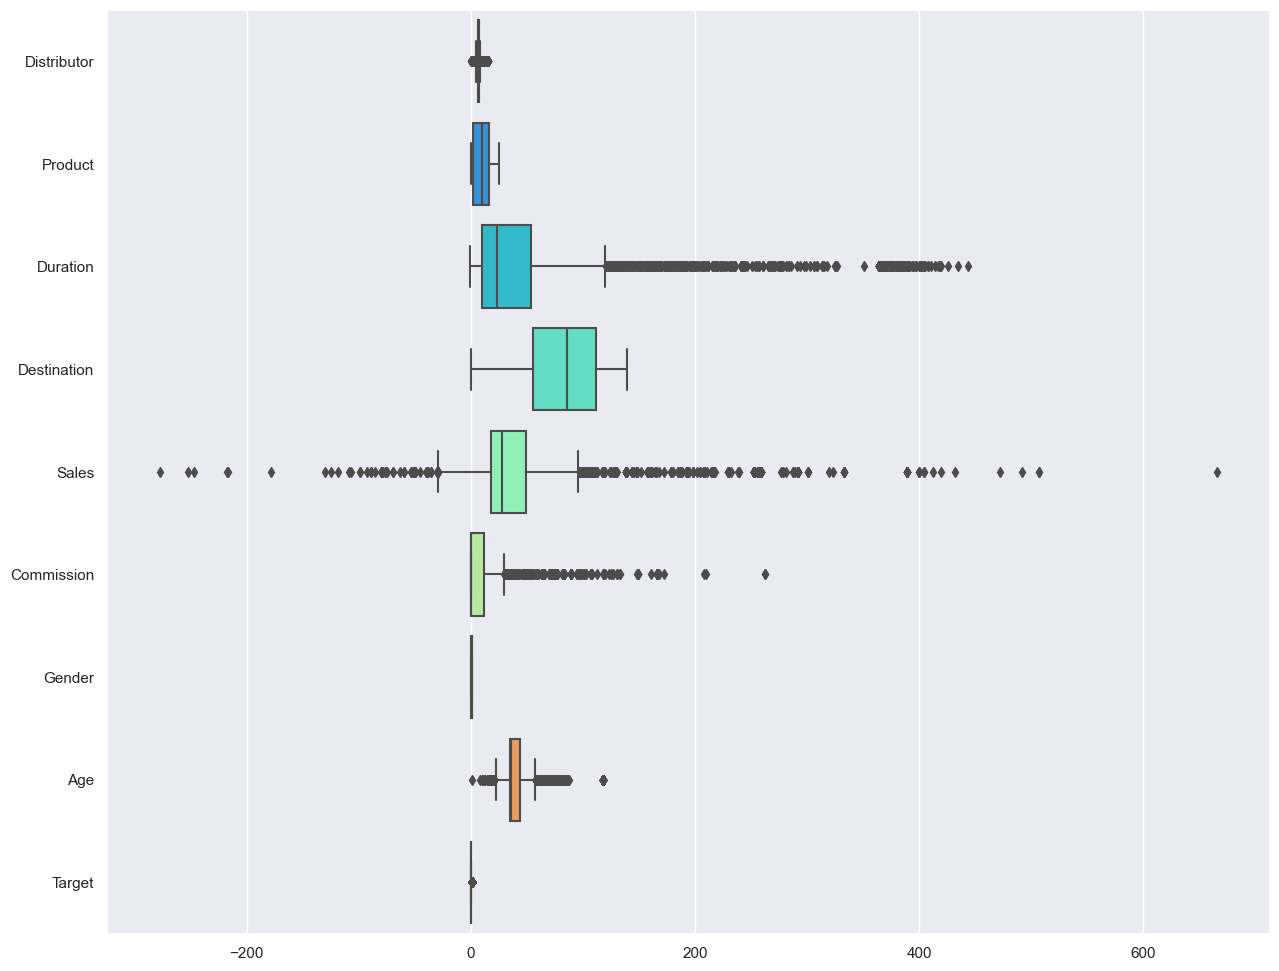

In [158]:
# boxplots (diagrama de caja) y violin plots are using to determine outliers
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(data=datafill,palette='rainbow',orient='h');

In [159]:
#Completar con la media
datafill['Gender'].fillna(datafill['Gender'].mean(), inplace=True)

In [160]:
# Verificar que no haya valores faltantes
print(datafill.isnull().sum())

ID             0
Distributor    0
Product        0
Duration       0
Destination    0
Sales          0
Commission     0
Gender         0
Age            0
Target         0
dtype: int64


#### 2. Distribucion  de variables Objetivo

In [161]:
distribucion_target = data['Target'].value_counts()
print(distribucion_target)


0    6420
1     316
Name: Target, dtype: int64


## Crete Base Model  
####  1. RandomForest

Original dataset Counter({0: 6420, 1: 316})
Resampled dataset Counter({1: 5839, 0: 5058})


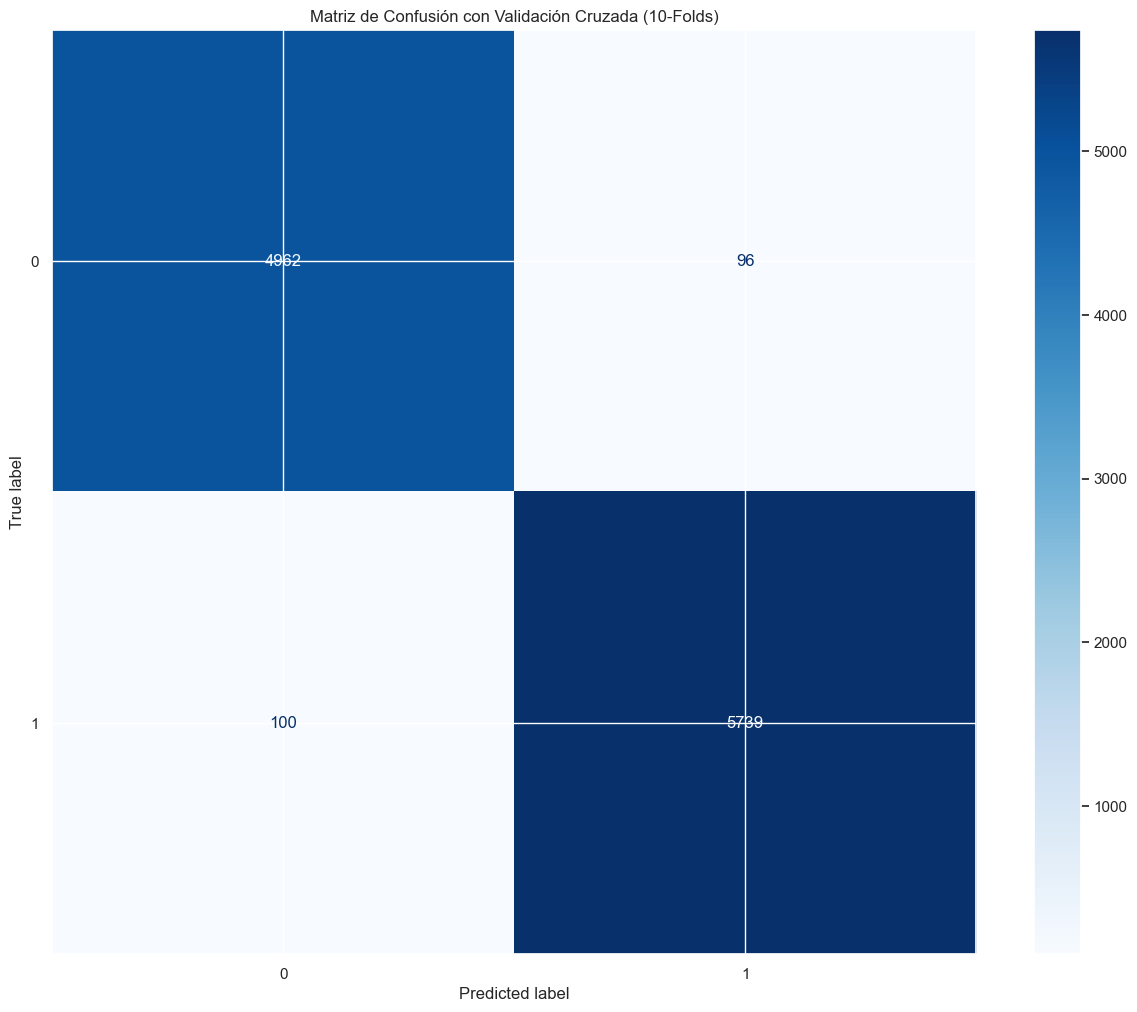

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.98      0.98      0.98      5058
     Clase 1       0.98      0.98      0.98      5839

    accuracy                           0.98     10897
   macro avg       0.98      0.98      0.98     10897
weighted avg       0.98      0.98      0.98     10897



In [166]:
#Case 1: Cross Validation
X = datafill.drop(columns=['Target','ID'], axis=1)
y = datafill['Target']

# Aplicar SMOTE + Tomek Links para el desbalanceo de clases
smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X, y)
print("Original dataset %s" % Counter(y))
print("Resampled dataset %s" % Counter(y_train))

# Configurar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Configurar validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Obtener las predicciones utilizando validación cruzada
y_pred = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred)

# Obtener las etiquetas de las clases
classes = np.unique(y_train)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión con Validación Cruzada (10-Folds)')
plt.show()

# Obtener métricas adicionales como precisión, recall y F1-score
report = classification_report(y_train, y_pred, target_names=[f'Clase {i}' for i in classes])
print("Reporte de Clasificación:")
print(report)


# Entrenar el modelo completo (sin validación cruzada)
resulmodel=model.fit(X_train, y_train)

In [169]:
#Set training
y_pred_training = model.predict(X_train)
#Calculate accuracy in train data
print("Training Data")
accuracytra = accuracy_score(y_train, y_pred_training)
reporttra = classification_report(y_train, y_pred_training)
matrixtra = confusion_matrix(y_train, y_pred_training)
print(f"Precisión: {accuracytra}")
print("Reporte de clasificación:")
print(reporttra)
print("Matriz de confusión:")
print(matrixtra)
print("  ")

Training Data
Precisión: 1.0
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5058
           1       1.00      1.00      1.00      5839

    accuracy                           1.00     10897
   macro avg       1.00      1.00      1.00     10897
weighted avg       1.00      1.00      1.00     10897

Matriz de confusión:
[[5058    0]
 [   0 5839]]
  


In [167]:
# Guardar el modelo entrenado en un archivo
import joblib
joblib.dump(model, './models/rf_model_medicalkid.pkl')

['./models/rf_model_medicalkid.pkl']

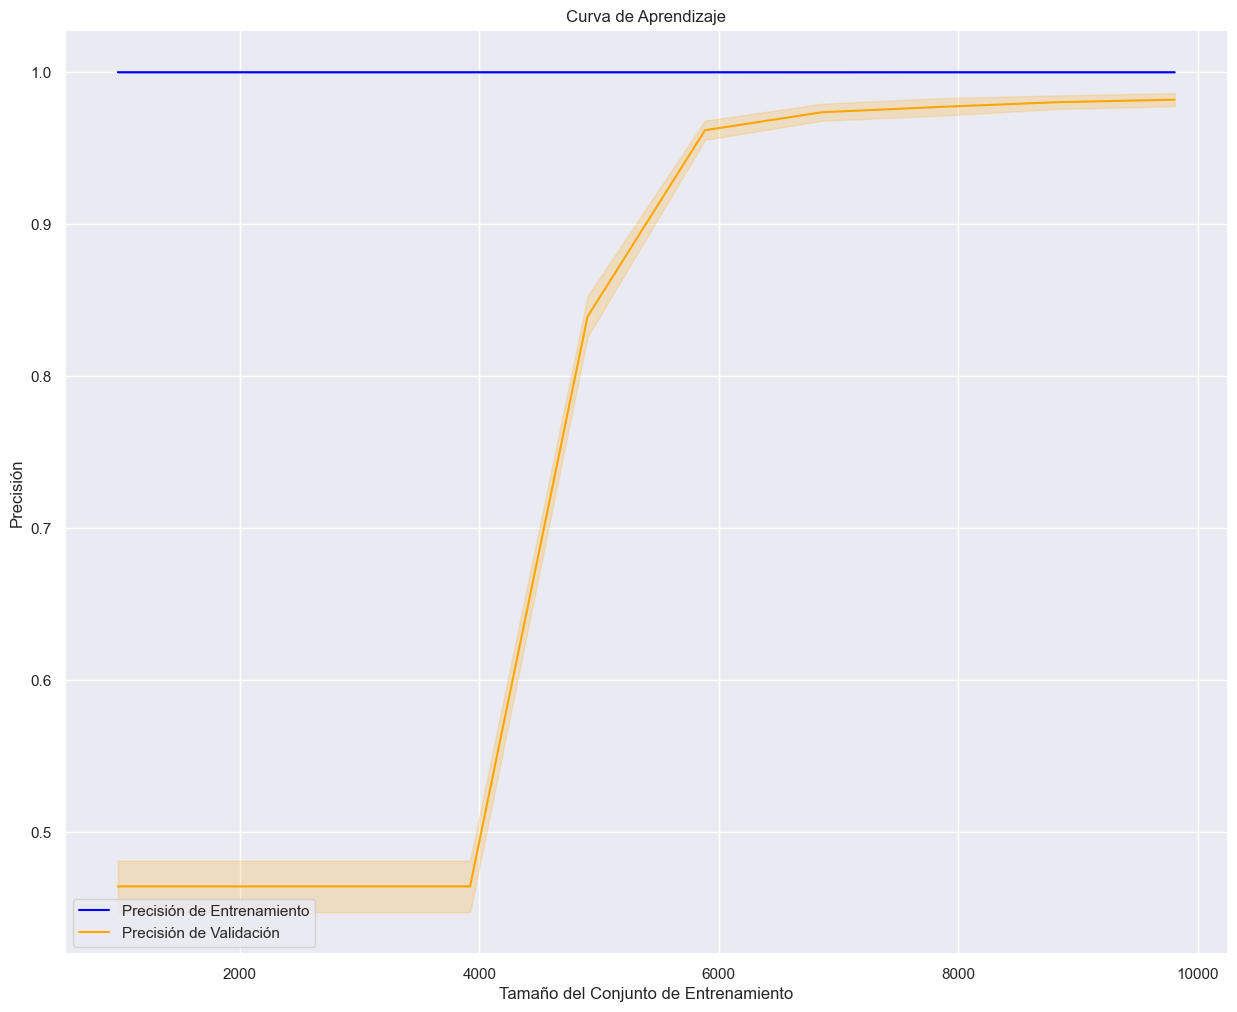

In [170]:
# Obtener la curva de aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=cv, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         scoring='accuracy', n_jobs=-1)

# Calcular la media y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.plot(train_sizes, train_mean, label='Precisión de Entrenamiento', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, valid_mean, label='Precisión de Validación', color='orange')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='orange', alpha=0.2)
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
#Case 2: Split the data in training y test(80% -20%) 

X = datafill.drop(columns=['Target'], axis=1)
y =  datafill['Target']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar el ID por separado antes de eliminarlo de las características
#ID: Es un identificador único para cada registro en tu conjunto de datos. 
#No contiene información que pueda ser útil para predecir la variable objetivo (Target).
#Dejarla en el conjunto de características puede añadir ruido y afectar negativamente al modelo
#Por lo anterior de borra
train_ids = X_train['ID']
test_ids = X_test['ID']

# Eliminar la columna 'ID' de las características
X_train = X_train.drop(['ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)

# Ver el conteo original de las clases
print("Original Training dataset %s" % Counter(y_train))
print("Oroginal Test dataset %s" % Counter(y_test))


# Aplicar SMOTE + Tomek Links
smote_enn1 = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn1.fit_resample(X_train, y_train)
X_test_res, y_test_res = smote_enn1.fit_resample(X_test, y_test)

# Ver el conteo de las clases después de SMOTE + Tomek Links
print("Resampled dataset training shape %s" % Counter(y_train_res))
print("Resampled dataset test shape %s" % Counter(y_test_res))

Original Training dataset Counter({0: 5143, 1: 245})
Oroginal Test dataset Counter({0: 1277, 1: 71})
Resampled dataset training shape Counter({1: 4659, 0: 4054})
Resampled dataset test shape Counter({1: 1158, 0: 1018})


In [172]:
# Create the model Random Forest
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
result= model1.fit(X_train_res, y_train_res)

# Realizar predicciones
#Set training
y_pred_training = model1.predict(X_train_res)
y_pred_test = model1.predict(X_test_res)

# Evaluar el modelo
#Calculate accuracy in train data
print("Training Data")
accuracytra = accuracy_score(y_train_res, y_pred_training)
reporttra = classification_report(y_train_res, y_pred_training)
matrixtra = confusion_matrix(y_train_res, y_pred_training)
print(f"Precisión: {accuracytra}")
print("Reporte de clasificación:")
print(reporttra)
print("Matriz de confusión:")
print(matrixtra)
print("  ")

# Calculate accuracy in test data
accuracy = accuracy_score(y_test_res, y_pred_test)
report = classification_report(y_test_res, y_pred_test)
matrix = confusion_matrix(y_test_res, y_pred_test)
print("Test Data")
print(f"Precisión: {accuracy}")
print("Reporte de clasificación:")
print(report)
print("Matriz de confusión:")
print(matrix)

Training Data
Precisión: 1.0
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4054
           1       1.00      1.00      1.00      4659

    accuracy                           1.00      8713
   macro avg       1.00      1.00      1.00      8713
weighted avg       1.00      1.00      1.00      8713

Matriz de confusión:
[[4054    0]
 [   0 4659]]
  
Test Data
Precisión: 0.90625
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1018
           1       0.95      0.87      0.91      1158

    accuracy                           0.91      2176
   macro avg       0.91      0.91      0.91      2176
weighted avg       0.91      0.91      0.91      2176

Matriz de confusión:
[[ 965   53]
 [ 151 1007]]


**2. Preprocesar los nuevos datos**

Archivo text.cvs

In [148]:
# Preprocesar los nuevos datos
datates['Gender'].fillna(method='bfill', inplace=True)
datates['Gender'].fillna(datates['Gender'].mean(), inplace=True)

# Realizar predicciones nuevo casos sin etiqueta
new_ids = datates['ID']
new_X = datates.drop(['ID'], axis=1)

In [149]:
print(new_X.isnull().sum())

Distributor    0
Product        0
Duration       0
Destination    0
Sales          0
Commission     0
Gender         0
Age            0
dtype: int64


In [174]:
# Utilizar el modelo cargado para hacer predicciones
# Cargar el modelo desde el archivo escenario CASE 1

loaded_model = joblib.load('./models/rf_model_medicalkid.pkl')
y_predNew = loaded_model.predict(new_X)

# Asociar las predicciones con los IDs
results = pd.DataFrame({'ID': new_ids, 'Predicted_Target': y_predNew})

# Mostrar los resultados
print("\nResultados de las nuevas predicciones:")
print(results)

# Escribir el DataFrame a un archivo CSV
results.to_csv("./bdb-ml-test/dataset/prediction.csv", index=False)



Resultados de las nuevas predicciones:
                            ID  Predicted_Target
0     fffe31003600330038003500                 0
1     fffe33003600300031003400                 0
2             fffe320033003300                 1
3             fffe390039003800                 0
4         fffe3500350031003000                 1
...                        ...               ...
2159      fffe3800350033003300                 0
2160  fffe34003700330030003900                 0
2161  fffe32003000330035003500                 1
2162      fffe3100370032003100                 0
2163      fffe3800340030003400                 1

[2164 rows x 2 columns]


In [175]:
# Utilizar el modelo cargado para hacer predicciones
# Cargar el modelo desde el archivo escenario CASE 2 (80% -20%)

#loaded_model = joblib.load('./models/rf_model_medicalkid.pkl')
y_predNew = model1.predict(new_X)

# Asociar las predicciones con los IDs
results = pd.DataFrame({'ID': new_ids, 'Predicted_Target': y_predNew})

# Mostrar los resultados
print("\nResultados de las nuevas predicciones:")
print(results)

# Escribir el DataFrame a un archivo CSV
results.to_csv("./bdb-ml-test/dataset/prediction2.csv", index=False)



Resultados de las nuevas predicciones:
                            ID  Predicted_Target
0     fffe31003600330038003500                 0
1     fffe33003600300031003400                 0
2             fffe320033003300                 1
3             fffe390039003800                 0
4         fffe3500350031003000                 1
...                        ...               ...
2159      fffe3800350033003300                 0
2160  fffe34003700330030003900                 0
2161  fffe32003000330035003500                 1
2162      fffe3100370032003100                 0
2163      fffe3800340030003400                 1

[2164 rows x 2 columns]


En un modelo de clasificación con Random Forest, es necesario codificar las variables categóricas antes de entrenar el modelo. Puedes utilizar técnicas como la codificación One-Hot o la codificación ordinal para convertir las categorías en representaciones numéricas.

In [182]:
#cargar datos
import pandas as pd
from sklearn.preprocessing import LabelEncoder #Convertir las columnas categóricas a numéricas

# Datos de ejemplo
data = {
    'ID': ['fffe3800370038003900', 'fffe34003200370037003500', 'fffe32003100320030003200'],
    'Distributor': [7, 7, 7],
    'Product': [1, 1, 10],
    'Duration': [22, 26, 15],
    'Destination': [122, 52, 83],
    'Sales': [31.0, 22.0, 63.0],
    'Commission': [0.0, 0.0, 0.0],
    'Gender': ['Male', 'Female', 'Female'],
    'Age': [20, 36, 34],
    'Target': [0, 0, 0]
}

df = pd.DataFrame(data)

# Ver los datos
print("Original data")
print(df)
# Crear una copia de los datos para no modificar el DataFrame original
df_model = df.copy()

# Convertir la columna 'ID' y 'Gender' a valores numéricos
label_encoder_id = LabelEncoder()
df_model['ID'] = label_encoder_id.fit_transform(df_model['ID'])

label_encoder_gender = LabelEncoder()
df_model['Gender'] = label_encoder_gender.fit_transform(df_model['Gender'])

# Variable objetivo
y = df_model['Target']

# Características (incluyendo 'ID')
X = df_model.drop(['Target'], axis=1)

print("Codified Data ")
print(X)

Original data
                         ID  Distributor  Product  Duration  Destination  \
0      fffe3800370038003900            7        1        22          122   
1  fffe34003200370037003500            7        1        26           52   
2  fffe32003100320030003200            7       10        15           83   

   Sales  Commission  Gender  Age  Target  
0   31.0         0.0    Male   20       0  
1   22.0         0.0  Female   36       0  
2   63.0         0.0  Female   34       0  
Codified Data 
   ID  Distributor  Product  Duration  Destination  Sales  Commission  Gender  \
0   2            7        1        22          122   31.0         0.0       1   
1   1            7        1        26           52   22.0         0.0       0   
2   0            7       10        15           83   63.0         0.0       0   

   Age  
0   20  
1   36  
2   34  
